In [1]:
import os
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
engram_dir = '/mnt/smb/locker/abbott-locker/hcnn/'

In [3]:
# Set up parameters
DEVICE = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(f'Device: {DEVICE}')
checkpoints_dir = f'{engram_dir}1_checkpoints/'
tensorboard_dir = f'{engram_dir}1_tensorboard/'
n_timesteps = 5

Device: cuda:0


# Pnets to Compare

In [4]:
pnets = [
    'pnet', 'pnet_snr-9',
    'pnet_cgram_shuffle', 'pnet_gammaNoise'
    ]
pnet_chckpts = [1960, 7060, 1440, 1830]
pnet_names = [
    'Clean', 'SNR -9',
    'Shuffled cgrams', 'Gamma Noise'
    ]

In [5]:
n_pnets = len(pnets)

In [6]:
n_layers = 5
layer_keys = [
    'pcoder1.pmodule.1.weight', 'pcoder2.pmodule.1.weight',
    'pcoder3.pmodule.1.weight', 'pcoder4.pmodule.0.weight',
    'pcoder5.pmodule.0.weight'
    ]

In [7]:
state_dicts = []
for pnet, chckpt in zip(pnets, pnet_chckpts):
    state_dict = torch.load(
        f"{checkpoints_dir}{pnet}/{pnet}-{chckpt}-regular.pth",
        map_location=torch.device('cpu')
        )
    state_dicts.append(state_dict)

# Gather similarity measures

In [8]:
from scipy.stats import pearsonr
from numpy.linalg import norm

In [11]:
sims = [np.zeros((n_pnets, n_pnets)) for l in range(n_layers)]
for i, state_dict_i in enumerate(state_dicts):
    for j, state_dict_j in enumerate(state_dicts):
        if i == j: continue
        for l, key in enumerate(layer_keys):
            fb_i = state_dict_i[key].flatten()
            fb_j = state_dict_j[key].flatten()
            r, _ = pearsonr(fb_i, fb_j)
            #r = np.dot(fb_i, fb_j)/(norm(fb_i)*norm(fb_j))
            #r = norm(fb_i - fb_j)
            sims[l][i][j] = r

# Plot

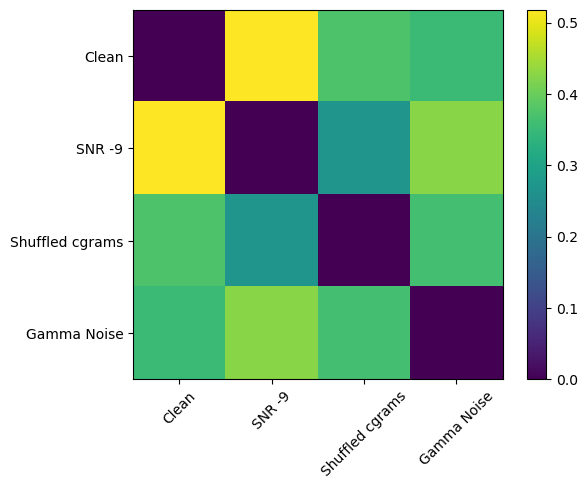

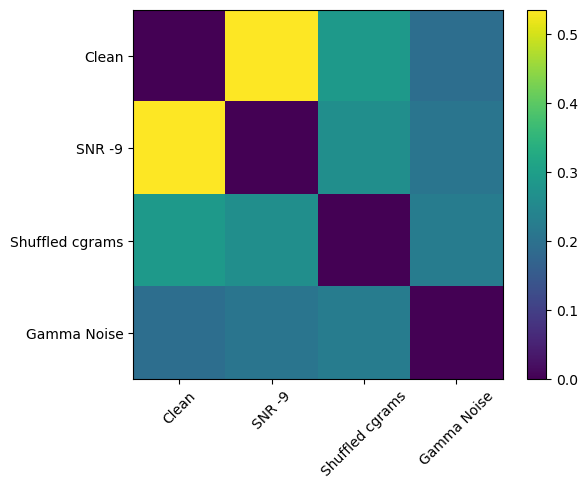

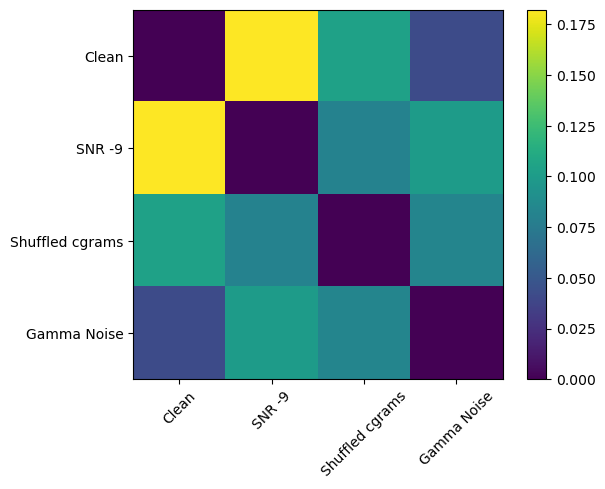

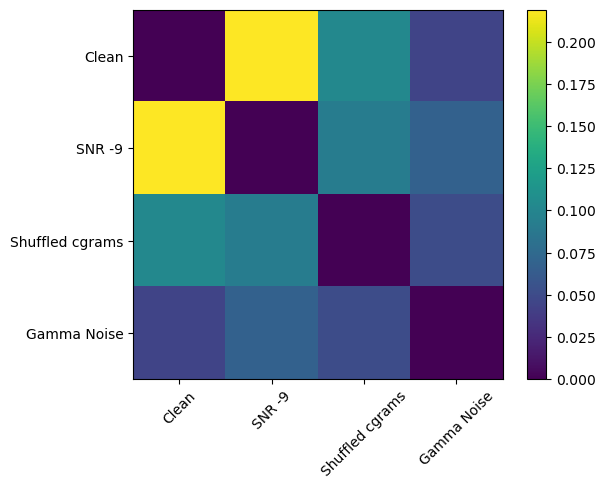

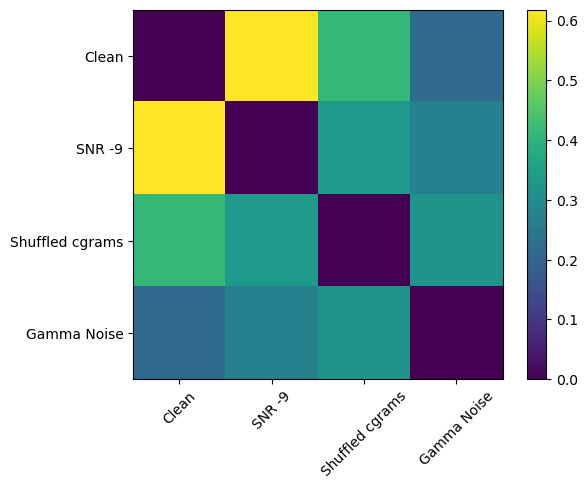

In [12]:
for sim in sims:
    plt.figure()
    plt.imshow(sim)
    plt.xticks(np.arange(n_pnets), pnet_names, rotation=45)
    plt.yticks(np.arange(n_pnets), pnet_names)
    plt.colorbar()
    plt.show()

# Shuffled

In [9]:
sims = [np.zeros((n_pnets, n_pnets)) for l in range(n_layers)]
for i, state_dict_i in enumerate(state_dicts):
    for j, state_dict_j in enumerate(state_dicts):
        if i == j: continue
        for l, key in enumerate(layer_keys):
            fb_i = state_dict_i[key].flatten()
            fb_j = state_dict_j[key].flatten()
            np.random.shuffle(fb_i)
            np.random.shuffle(fb_j)
            r, _ = pearsonr(fb_i, fb_j)
            #r = np.dot(fb_i, fb_j)/(norm(fb_i)*norm(fb_j))
            #r = norm(fb_i - fb_j)
            sims[l][i][j] = r

/home/cf2794/.conda/envs/hcnn/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: you are shuffling a 'Tensor' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  
/home/cf2794/.conda/envs/hcnn/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: you are shuffling a 'Tensor' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  if __name__ == '__main__':


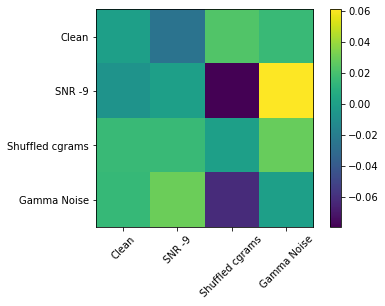

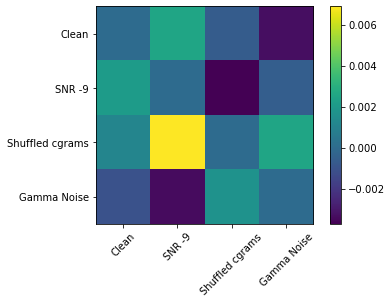

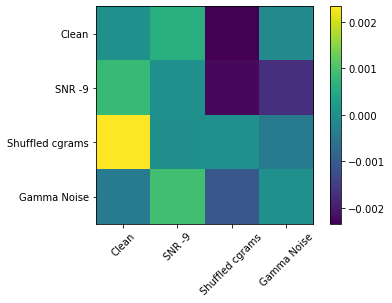

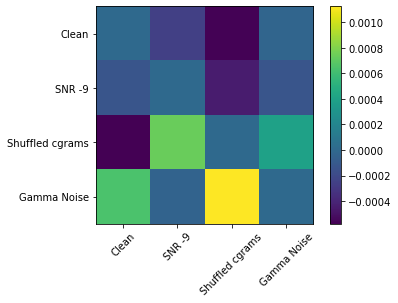

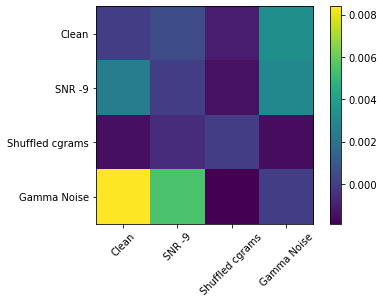

In [10]:
for sim in sims:
    plt.figure()
    plt.imshow(sim)
    plt.xticks(np.arange(n_pnets), pnet_names, rotation=45)
    plt.yticks(np.arange(n_pnets), pnet_names)
    plt.colorbar()
    plt.show()